# Spotify Track Dataset (Kurzfassung)

- **track_id**: Spotify-ID des Tracks
- **artists**: Namen der Künstler, getrennt durch `;`.
- **album_name**: Name des Albums.
- **track_name**: Titel des Tracks.
- **popularity**: Beliebtheit (0–100), basierend auf Wiedergaben und Aktualität.
- **duration_ms**: Länge in Millisekunden.
- **explicit**: Enthält explizite Inhalte (`true`/`false`).
- **danceability**: Eignung zum Tanzen (0.0–1.0).
- **energy**: Intensität und Aktivität (0.0–1.0).
- **key**: Tonart (0 = C, 1 = C♯/D♭, …, -1 = keine).
- **loudness**: Lautstärke in dB.
- **mode**: Tonart (1 = Dur, 0 = Moll).
- **speechiness**: Anteil gesprochener Wörter (0.0–1.0).
- **acousticness**: Wahrscheinlichkeit, dass der Track akustisch ist (0.0–1.0).
- **instrumentalness**: Wahrscheinlichkeit, dass der Track ohne Gesang ist (0.0–1.0).
- **liveness**: Wahrscheinlichkeit einer Live-Aufnahme (0.0–1.0).
- **valence**: Stimmung des Tracks (positiv/negativ, 0.0–1.0).
- **tempo**: Tempo in BPM (Schläge pro Minute).
- **time_signature**: Taktart (3 = 3/4, 4 = 4/4, …).
- **track_genre**: Genre des Tracks.

In [74]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])
dataFrm.sample(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
54912,54912,0ygeqZElN0Wcl0mFfUscDn,SubtractiveLAD,Nucleus,From Seed,9,274243,False,0.133,0.472,...,-12.677,1,0.0445,0.764,0.902,0.108,0.0333,82.178,4,idm
29457,29457,36tSNnMctCGaxQp0JVGBLC,Pinch,Qawwali,Qawwali,30,319416,False,0.787,0.292,...,-15.108,0,0.0772,0.141,0.929,0.110,0.0854,136.013,4,dubstep
113332,113332,2hJtYiDfwn57achG9nuiyl,Chris Tomlin,Arriving,Unfailing Love,40,239973,False,0.599,0.647,...,-5.846,1,0.0257,0.395,0.000,0.129,0.5200,141.930,4,world-music


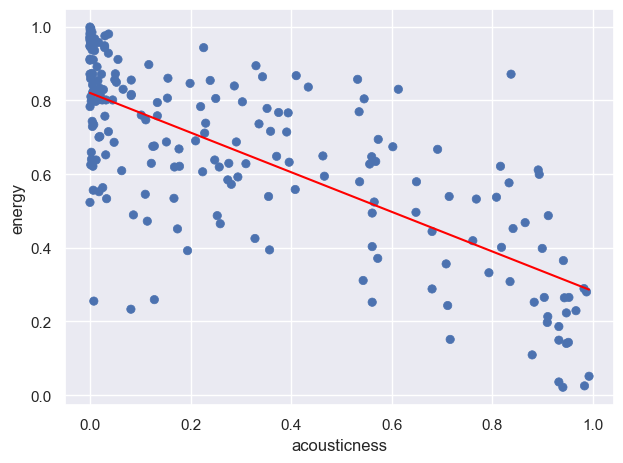

In [75]:

so.Plot(dataFrm.sample(200), x="acousticness", y="energy").add(
    so.Dot()  # Linie für die Regressionsanpassung
).add(so.Line(color='red'), so.PolyFit(order=1)).label(
    xlabel="X-Werte",
    ylabel="Y-Werte"
).scale(
    color_continuous="#1f77b4"  # Optionale Anpassung der Farbe
).show()


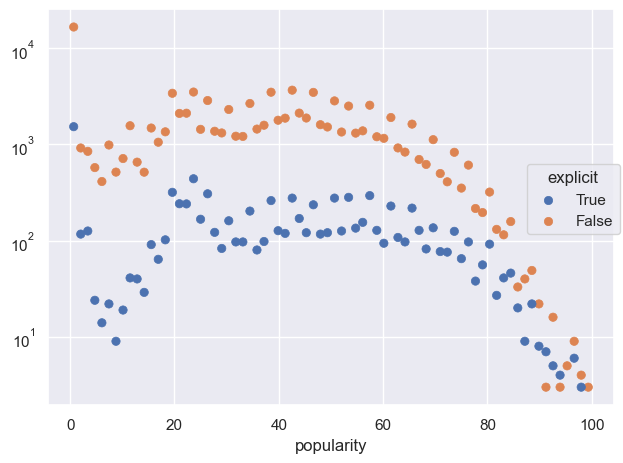

In [76]:
so.Plot(dataFrm, x="popularity", color="explicit").add(
    so.Dot(), so.Hist(),
).scale(
    y="log",  # Logarithmische Skalierung der y-Achse
    color_continuous="#1f77b4"  # Optionale Farbanpassung
).show()


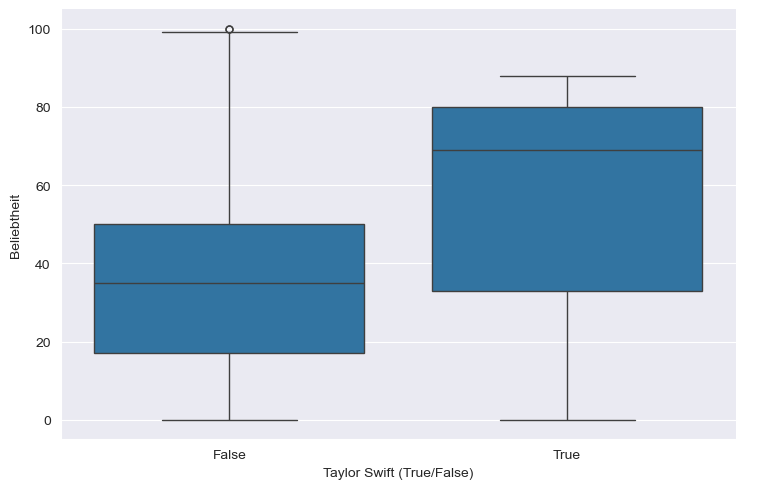

In [77]:
# Filter für Taylor Swift
taylor_swift = dataFrm[dataFrm['artists'].str.contains("Taylor Swift", na=False)]
others = dataFrm[~dataFrm['artists'].str.contains("Taylor Swift", na=False)]

# Neue Spalte für Gruppen
dataFrm['is_taylor'] = dataFrm['artists'].str.contains("Taylor Swift", na=False)

# Diagramm
sns.catplot(
    data=dataFrm,
    x='is_taylor',
    y='popularity',
    kind='box',
    aspect=1.5,
).set_axis_labels("Taylor Swift (True/False)", "Beliebtheit")



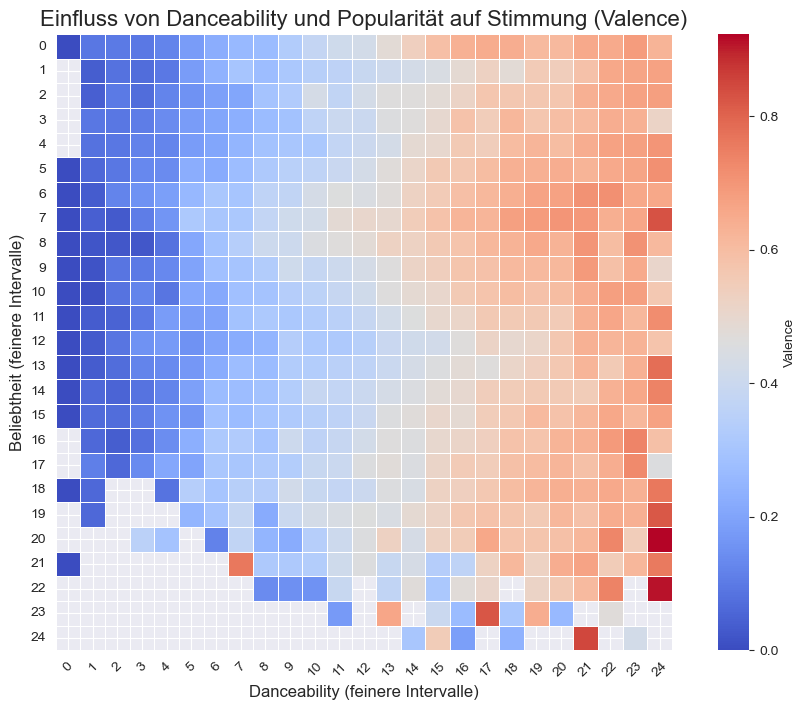

In [78]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset laden
dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])

# Danceability und Popularity in kleinere Intervalle aufteilen (feiner)
dataFrm['danceability_bin'] = pd.cut(dataFrm['danceability'], bins=25, labels=False)  # 20 Bins für Danceability
dataFrm['popularity_bin'] = pd.cut(dataFrm['popularity'], bins=25, labels=False)  # 20 Bins für Popularity

# Heatmap-Daten aggregieren: Durchschnitt von Valence
heatmap_data = dataFrm.pivot_table(
    index='popularity_bin',
    columns='danceability_bin',
    values='valence',
    aggfunc='mean'
)

# Heatmap erstellen
plt.figure(figsize=(12, 8))  # Größere Figur für bessere Lesbarkeit
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',           # Farbverlauf
    cbar_kws={'label': 'Valence'},  # Farblegende beschriften
    linewidths=0.5,
    annot=False,               # Werte in den Zellen anzeigen
    fmt='.2f',                # Zwei Dezimalstellen
    square=True               # Quadratformat für die Heatmap
)

plt.title("Einfluss von Danceability und Popularität auf Stimmung (Valence)", fontsize=16)
plt.xlabel("Danceability (feinere Intervalle)", fontsize=12)
plt.ylabel("Beliebtheit (feinere Intervalle)", fontsize=12)
plt.xticks(rotation=45)  # X-Achsen-Beschriftungen neigen für bessere Lesbarkeit
plt.yticks(rotation=0)   # Y-Achsen-Beschriftungen horizontal
plt.show()


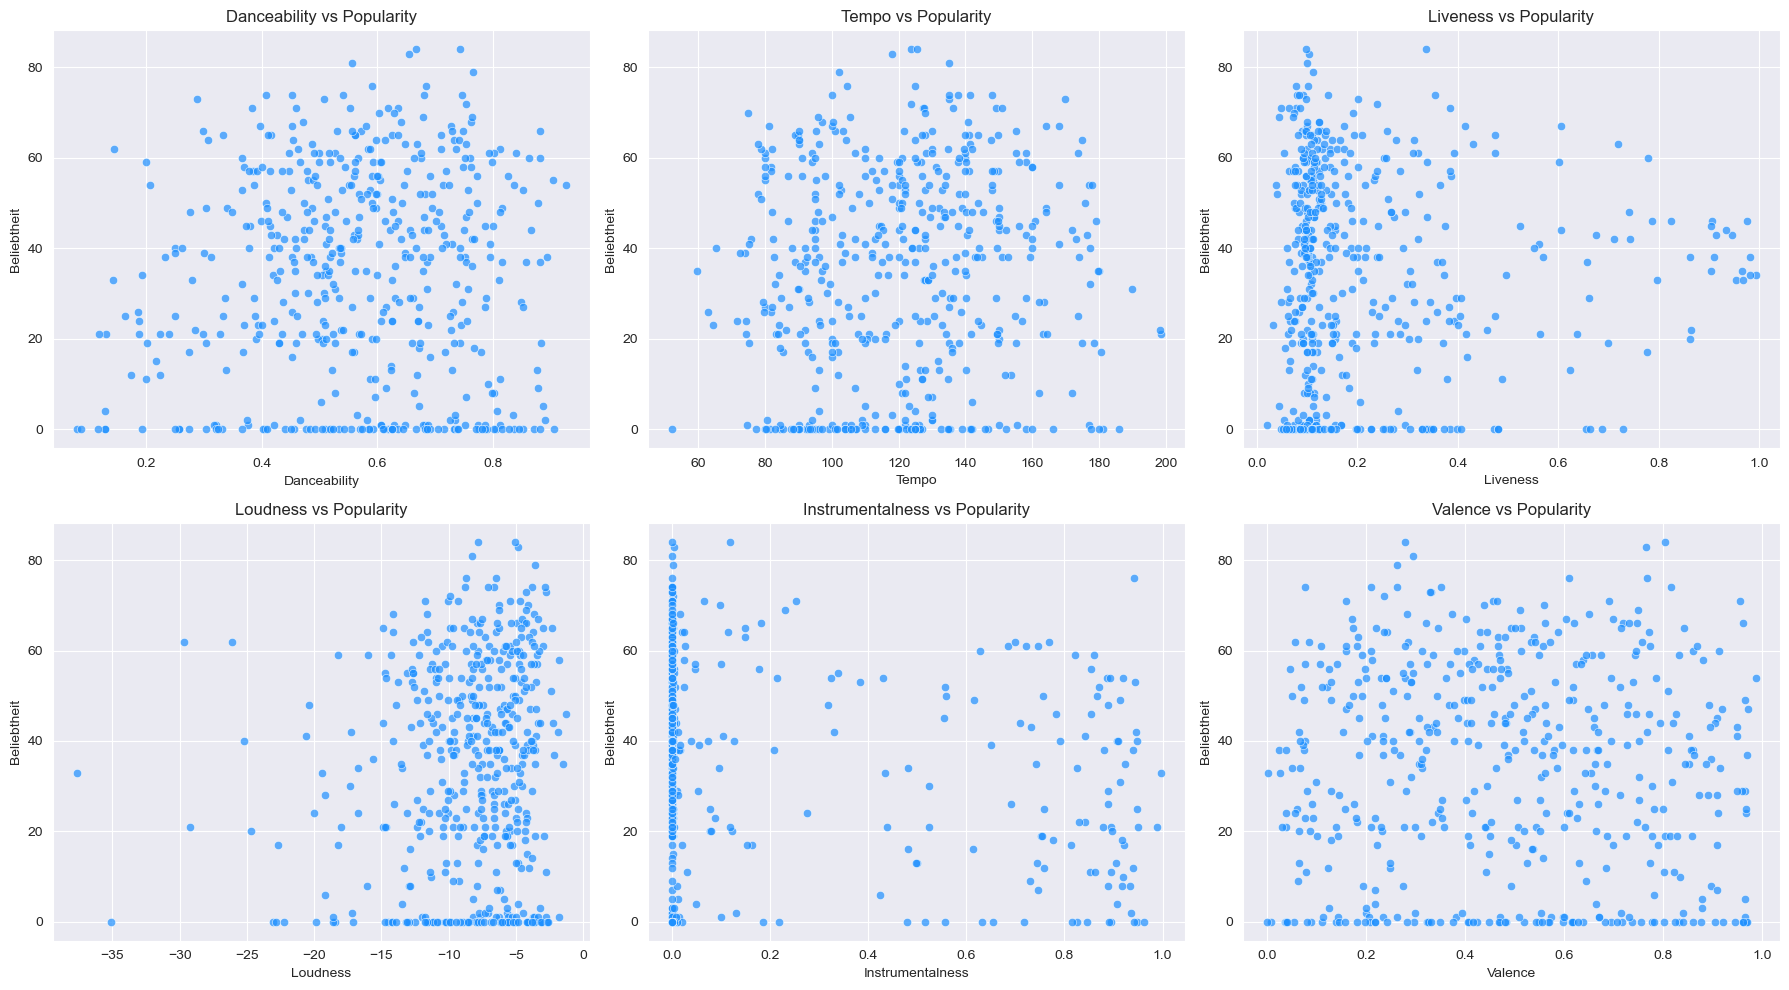

In [80]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset laden
dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])
dataFrm = dataFrm.sample(500)
# Erstellen von Subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 Zeilen, 3 Spalten
axes = axes.flatten()  # Flache Liste von Achsen für einfacheren Zugriff

# Liste der zu betrachtenden Attribute
attributes = ['danceability', 'tempo', 'liveness', 'loudness', 'instrumentalness', 'valence']
titles = [
    'Danceability vs Popularity',
    'Tempo vs Popularity',
    'Liveness vs Popularity',
    'Loudness vs Popularity',
    'Instrumentalness vs Popularity',
    'Valence vs Popularity'
]

# Scatterplots für jedes Attribut erstellen
for i, attribute in enumerate(attributes):
    sns.scatterplot(
        data=dataFrm,
        x=attribute,
        y='popularity',
        ax=axes[i],  # Achse auswählen
        color='dodgerblue',  # Farbe für die Punkte
        alpha=0.7,           # Transparenz der Punkte
    )
    axes[i].set_title(titles[i])  # Titel des Subplots
    axes[i].set_xlabel(attribute.capitalize())  # X-Achse beschriften
    axes[i].set_ylabel('Beliebtheit')  # Y-Achse beschriften

# Layout anpassen, damit die Plots nicht überlappen
plt.tight_layout()
plt.show()
